<a href="https://colab.research.google.com/github/alvafox/Aprendizaje-supervisado/blob/main/Support_Vector_Machine_(OE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador de Objetivos de Estudio (SVM)**


SVM significa "Support Vector Machine" o "Máquina de Vectores de Soporte" en español. Es un tipo de modelo de aprendizaje supervisado utilizado para la clasificación o regresión.

Las SVM encuentran el hiperplano que mejor separa los datos de diferentes clases en un espacio de alta dimensionalidad. El hiperplano es una superficie que separa los datos de diferentes clases de manera óptima. Los vectores de soporte son los puntos más cercanos al hiperplano y son importantes para definir la ubicación del hiperplano.

Las SVM se utilizan comúnmente en aplicaciones de aprendizaje automático debido a su capacidad para manejar conjuntos de datos grandes y complejos, y pueden funcionar bien en conjuntos de datos con varias clases. Los SVM también pueden ser eficaces en problemas de regresión al encontrar el hiperplano que mejor se ajusta a los datos de entrenamiento.

En resumen, SVM es la abreviatura de "Support Vector Machine" o "Máquina de Vectores de Soporte", y se utiliza para resolver problemas de clasificación o regresión en el aprendizaje supervisado.



- Padding: técnica que se utiliza para igualar la longitud de las secuencias en un conjunto de datos. Se añaden ceros a las secuencias más cortas para igualar la longitud de la secuencia más larga en el conjunto de datos.

- Normalize: técnica que se utiliza para normalizar los datos, es decir, convertir los datos en una escala común. Se utiliza para que las características tengan la misma importancia en la clasificación, independientemente de la escala de los valores.

- StandardScaler: técnica que se utiliza para estandarizar los datos, es decir, transformar los datos para que tengan una media de cero y una desviación estándar de uno. Se utiliza para que las características tengan la misma varianza y para eliminar la influencia de valores extremos.

- Min-max Scaler: técnica que se utiliza para escalar los datos en un rango específico, generalmente de 0 a 1. Se utiliza para que las características tengan la misma escala y para que los valores de los datos no sean demasiado grandes.

- Robust Scaler: técnica que se utiliza para escalar los datos, pero es más robusta a los valores extremos que el StandardScaler. Se utiliza cuando los datos tienen valores atípicos o cuando la distribución de los datos es muy sesgada.

- MaxAbsScaler: técnica que se utiliza para escalar los datos dividiéndolos por el valor máximo absoluto en el conjunto de datos. Se utiliza para que los datos tengan la misma escala y para que los valores de los datos no sean demasiado grandes.

- QuantileTransformer: técnica que se utiliza para transformar los datos en una distribución normal o uniforme. Se utiliza para eliminar la influencia de valores extremos y para que los datos sigan una distribución normal o uniforme.

Cada técnica se utiliza en situaciones específicas dependiendo de las características de los datos y del problema que se esté resolviendo.


```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

```
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Creamos una lista con 3 secuencias de diferentes longitudes
secuencias = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]

# Hacemos padding para dejar todas las secuencias con la misma longitud
max_len = 4
padded_secuencias = pad_sequences(secuencias, maxlen=max_len, padding='post')

print(padded_secuencias)
```

```
from sklearn.preprocessing import normalize
X_normalized = normalize(X, norm='l2')

```

## Importar librerías
---

In [1]:
# importar bibliotecas
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

In [69]:
!pip install ftfy
!pip install tqdm
import ftfy
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import pandas as pd
df = pd.read_csv("/gdrive/MyDrive/INSUMOS/DOCTORADOS (2021-2023).csv", sep=";",encoding="latin1")
df = df.fillna("-")
df

,AÑO,FOLIO,COMITÉ INICIAL (TP),COMITÉ DEFINITIVO (L2),OBJETIVO,PROGRAMA,PALABRAS 1,PALABRAS 2,PALABRAS 3
0,2021,21210001,Ecología y Ciencias Naturales,Ecología y Ciencias Naturales,"Contaminación, tecnología y remediación del ag...",Doctorado en Ciencias Ambientales mención Sist...,"2513 Ciencias Ambientales - 1 Tratamiento, dep...",2513 Ciencias Ambientales - 18 Gestión de resi...,-
1,2021,21210002,Cs. de la Ingeniería II,Cs. de la Ingeniería II,La pérdida de piezas dentales afecta la calida...,Doctorado en Ingeniería Metalúrgica,3312 Tecnología de materiales - 12 Ensayos de ...,3315 Tecnología metalúrgica - 11 Pulvimetalurgia,-
2,2021,21210003,Biología Celular y Molecular,Biología Celular y Molecular,La lesión de médula espinal (LME) es una condi...,Doctorado en Ciencias Biológicas mención Biolo...,2407 Biología celular - 01 Cultivo celular,2407 Biología celular - 05 Cultivo de tejidos,2407 Biología celular - 06 Regeneración tisular
3,2021,21210004,Cs. Políticas y Estudios Internacionales,Derecho,La evaluación del cumplimiento efectivo que se...,Doctorado en Ciencia Política,5905 Política Comparada - 01 Instituciones Pol...,-,-
4,2021,21210005,Administración,Administración,1.- Debido al rol que cumplen las IES en la fo...,Doctorado en Ciencias Humanas,"6103 Psicología industrial, del trabajo y de l...",-,-
...,...,...,...,...,...,...,...,...,...
6225,2023,21232432,Biotecnología,Biotecnología,La flavobacteriosis es una enfermedad provocad...,Doctorado en Biotecnología,"2412 Inmunología (ver 2302.16, 3109.03, 3207.1...","2412 Inmunología (ver 2302.16, 3109.03, 3207.1...",-
6226,2023,21232435,Filosofía,Filosofía,Mi objetivo de estudio consiste en elaborar un...,Doctorado en Filosofía con mención en Filosofía,7201 Filosofía del conocimiento - 02 Epistemol...,7202 Antropología filosófica - 07 Filosofía de...,7207 Filosofía social - 01 Filosofia de la cul...
6227,2023,21232438,Derecho,Derecho,\r\nEstoy desarrollando mi investigación de D...,Doctorado en Derecho,5699 Otras especialidades jurídicas - otras,-,-
6228,2023,21232439,Agronomía y Forestal,Agronomía y Forestal,La tesis se alinea con el objetivo del program...,Doctorado en Ciencias de la Agricultura,3103 Agronomía (ver 2417 y 5312.01 ) - 04 Prot...,3103 Agronomía (ver 2417 y 5312.01 ) - 05 Técn...,-


In [5]:
pd.set_option("display.max_rows", 152)
df.groupby(["COMITÉ INICIAL (TP)","COMITÉ DEFINITIVO (L2)"])["FOLIO"].count().to_frame()

FOLIO
COMITÉ INICIAL (TP)                                COMITÉ DEFINITIVO (L2)                               
Administración                                     Administración                                     68
                                                   Cs. de la Ingeniería I                              1
Agronomía y Forestal                               Agronomía y Forestal                              271
                                                   Cs. Químicas                                        1
                                                   Cs. Veterinarias                                    1
                                                   Cs. de la Ingeniería II                             1
                                                   Ecología y Ciencias Naturales                       1
                                                   Políticas Públicas y Administración del Estado      1
Arquitectura                                       Arquitectura                                       49
                                                   Filosofía                                           1
Arte                                               Arte                                               64
Biología Celular y Molecular                       Biología Celular y Molecular                      352
                                                   Biología Fisiológica y Bioquímica                   1
                                                   Ecología y Ciencias Naturales                       1
Biología Fisiológica y Bioquímica                  Agronomía y Forestal                                1
                                                   Biología Celular y Molecular                        3
                                                   Biología Fisiológica y Bioquímica                 253
                                                   Biotecnología                                       4
                                                   Cs. Médicas                                         2
                                                   Ecología y Ciencias Naturales                       3
                                                   Letras                                              1
Biotecnología                                      Biotecnología                                     345
                                                   Cs. Médicas                                         4
                                                   Cs. de la Ingeniería II                             1
Computación e Informática                          Agronomía y Forestal                                1
                                                   Computación e Informática                         167
                                                   Cs. de la Ingeniería I                              2
                                                   Educación I                                         1
                                                   Física y Astronomía                                 1
Comunicación                                       Comunicación                                       63
                                                   Historia, Antropología y Arqueología                1
                                                   Sociología                                          1
Cs. Matemáticas                                    Cs. Matemáticas                                   240
                                                   Cs. de la Ingeniería I                              1
                                                   Educación I                                         1
                                                   Psicología                                          1
Cs. Médicas                                        Biología Celular y Molecular                        2
    

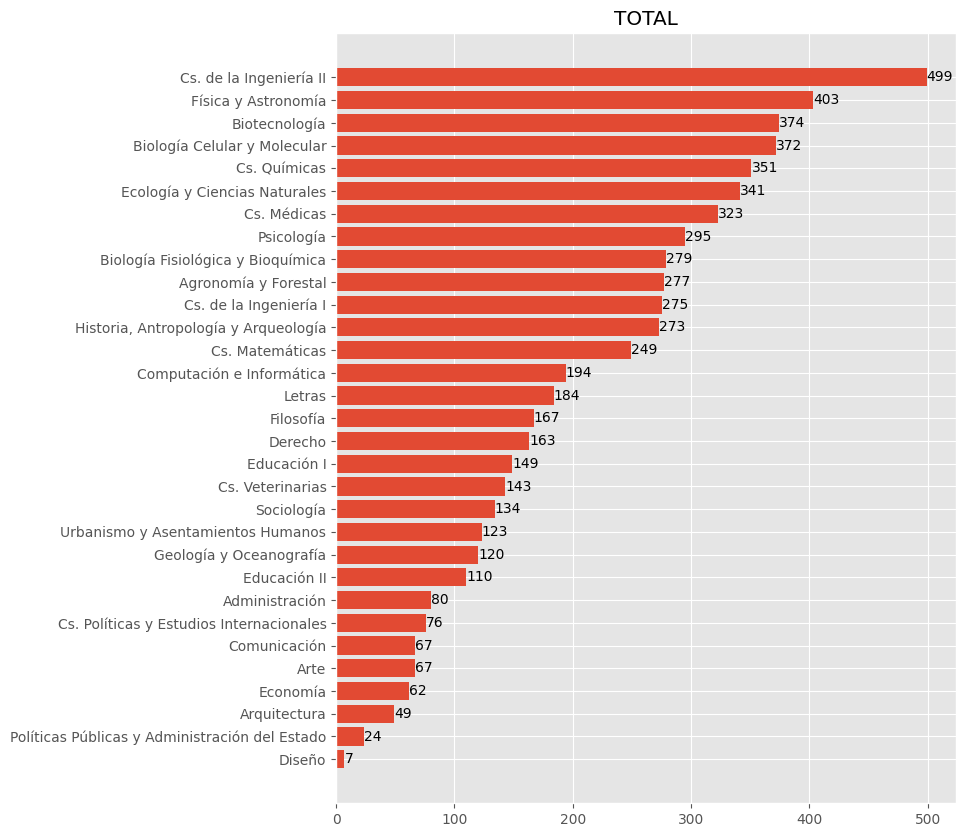

In [7]:
# crear el gráfico de barras
plt.style.use('ggplot')

graph = df.groupby(["COMITÉ DEFINITIVO (L2)"])["FOLIO"].count().sort_values()

plt.figure(figsize=(8, 10))
plt.barh(graph.index, graph.values)

plt.title("TOTAL")
for i, v in enumerate(graph.values):
    plt.text(v, i, str(v), ha='left', va='center')

Eliminaremos algunas palabras.

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))
stopwords.update(["embargo", "además", "través", "estudio", "mediante", "propuesta", "debido", "investigación", \
                  "chile", "proceso", "objetivo", "desarrollo", "trabajo", "así", "forma", "línea", "contexto", "tipo",\
                  "importante", "diferente", "posible", "manera", "dentro", "sido", "ello", "sistema", "modelo", "uso",\
                  "parte", "efecto", "proyecto", "problema", "estudios", "análisis","procesos", "área", "parte", \
                  "producción", "conocimiento", "relación", "año", "caso", "dato", "datos", "cambio", "sistemas", \
                  "resultado", "partir", "base", "grupo", "diferentes", "estructura", "mecanismo", "evaluar",\
                  "doctorado", "ejemplo", "cuales", "analizar", "impacto", "siendo", "si", "pueden", "frente",\
                  "método", "mayor", "actualmente", "existe", "principalmente", "presente", "gran", "solo", "punto",\
                  "bien", "sino", "años", "lado", "fin", "basado", "ser", "puede", "respecto", "vez", "mismo", "estudiar",\
                  "formación", "información", "país", "tiempo", "teoría", "interés", "determinar", "desarrollar", "resultados"\
                  "persona", "último", "cómo", "condicione", "medio", "respuesta", "estrategia", "general", "nivel", "programa",\
                  "experiencia", "bajo", "control", "producto", "capacidad", "nuevo", "nueva", "enfoque", "aporte", "problemas",\
                  "factores", "generar", "cabo", "debe", "podría", "realizar", "cada", "rol", "et", "and"])

stopwords= list(stopwords)
print(stopwords)


def clean(doc): # doc is a string of text
    doc = ftfy.fix_text(doc)
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = doc.replace("\n", "") 
    doc = doc.replace("\n\n", "") 
    doc = doc.replace("\n\n\n", "") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

['fuera', 'estuvieseis', 'teniendo', 'chile', 'estáis', 'tuya', 'datos', 'otra', 'línea', 'propuesta', 'hemos', 'desarrollar', 'et', 'qué', 'fuisteis', 'respecto', 'seréis', 'impacto', 'través', 'sí', 'fuiste', 'control', 'basado', 'cuales', 'también', 'suyos', 'sentidos', 'no', 'habrán', 'proceso', 'suya', 'tendríamos', 'rol', 'hay', 'así', 'tendrías', 'tuviese', 'tuvimos', 'general', 'habréis', 'nosotras', 'seré', 'tengan', 'algunas', 'habían', 'seas', 'estamos', 'habrás', 'estuvisteis', 'mismo', 'hubieses', 'estabas', 'de', 'fueron', 'hubiesen', 'tendrás', 'estando', 'frente', 'estuviéramos', 'programa', 'están', 'tenga', 'cabo', 'teníamos', 'tendré', 'estad', 'habré', 'todos', 'ser', 'ese', 'tus', 'tengo', 'esta', 'hubimos', 'información', 'tuvieran', 'estuviese', 'enfoque', 'mío', 'analizar', 'hayan', 'resultadospersona', 'sentida', 'una', 'aporte', 'ya', 'estaré', 'hayamos', 'seríais', 'estuvieron', 'teníais', 'estados', 'estado', 'tuve', 'tendremos', 'vez', 'seamos', 'esto', 'ha

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# preparar los datos
# Seleccionar las características
labels = df["COMITÉ DEFINITIVO (L2)"]
features = df["PROGRAMA"] + " " + df["OBJETIVO"] + " " + df["PALABRAS 1"]

objetivos = df["OBJETIVO"]
programas = df["PROGRAMA"]
comites_antes = df["COMITÉ INICIAL (TP)"]
palabras_uno = df["PALABRAS 1"]
palabras_dos = df["PALABRAS 2"]
palabras_tres = df["PALABRAS 3"]

# Vectorización de los datos
---

A continuación, utilizamos la técnica de Bolsa de Palabras para extraer características de los objetivos de estudio

In [10]:
# Vectorizar las características de texto
vectorizer = CountVectorizer(preprocessor=clean)

X = vectorizer.fit_transform(features).toarray()

from sklearn.preprocessing import normalize
X_normalized = normalize(X, norm='l2')

#objetivos_vec = vectorizer.fit_transform(objetivos).toarray()
#programas_vec = vectorizer.fit_transform(programas).toarray()
#palabras_uno_vec = vectorizer.fit_transform(palabras_uno).toarray()


#from sklearn.preprocessing import normalize

#X_normalized = normalize(X, norm='l2')
#palabras_dos_vec = vectorizer.fit_transform(palabras_dos).toarray()
#palabras_tres_vec = vectorizer.fit_transform(palabras_tres).toarray()
#comites_antes_vec = vectorizer.fit_transform(comites_antes)

caracteristicas = X_normalized 
#caracteristicas = np.hstack((objetivos_vec, programas_vec))
caracteristicas.shape

(6230, 106297)

En este código, utilizamos CountVectorizer para convertir los atributos en una matriz de características de Bolsa de Palabras. La función fit_transform ajusta el vectorizador a los datos de entrada y luego lo utiliza para transformar los objetivos de estudio en una matriz de características. La función toarray convierte la matriz de características en un arreglo NumPy.

## División de los datos para entrenamiento y predicción
---

Después, dividimos los datos en conjuntos de entrenamiento y prueba:

In [11]:
# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(caracteristicas, labels, test_size=0.2, random_state=42)

## Selección del modelo
---

Seleccionamos el modelo y lo entrenamos:

In [12]:
# seleccionar el modelo
model = SVC(kernel='linear')

## Entrenamiento
---

In [13]:
import time

start = time.time()

# entrenar el modelo
model.fit(X_train, y_train)

end = time.time()

total = end - start

print("Tiempo transcurrido:", round(total/60,2), "minutos")
display(modelo.fit(X_train, y_train))

Tiempo transcurrido: 33.07 minutos


In [14]:
# Realizar predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 80.34%


In [15]:
comites = list(df["COMITÉ DEFINITIVO (L2)"].unique())
comites.sort()
display(comites)

['Administración',
 'Agronomía y Forestal',
 'Arquitectura',
 'Arte',
 'Biología Celular y Molecular',
 'Biología Fisiológica y Bioquímica',
 'Biotecnología',
 'Computación e Informática',
 'Comunicación',
 'Cs. Matemáticas',
 'Cs. Médicas',
 'Cs. Políticas y Estudios Internacionales',
 'Cs. Químicas',
 'Cs. Veterinarias',
 'Cs. de la Ingeniería I',
 'Cs. de la Ingeniería II',
 'Derecho',
 'Diseño',
 'Ecología y Ciencias Naturales',
 'Economía',
 'Educación I',
 'Educación II',
 'Filosofía',
 'Física y Astronomía',
 'Geología y Oceanografía',
 'Historia, Antropología y Arqueología',
 'Letras',
 'Políticas Públicas y Administración del Estado',
 'Psicología',
 'Sociología',
 'Urbanismo y Asentamientos Humanos']

## Matriz de confusión
---

<ipython-input-51-2628c75aab51>:15: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


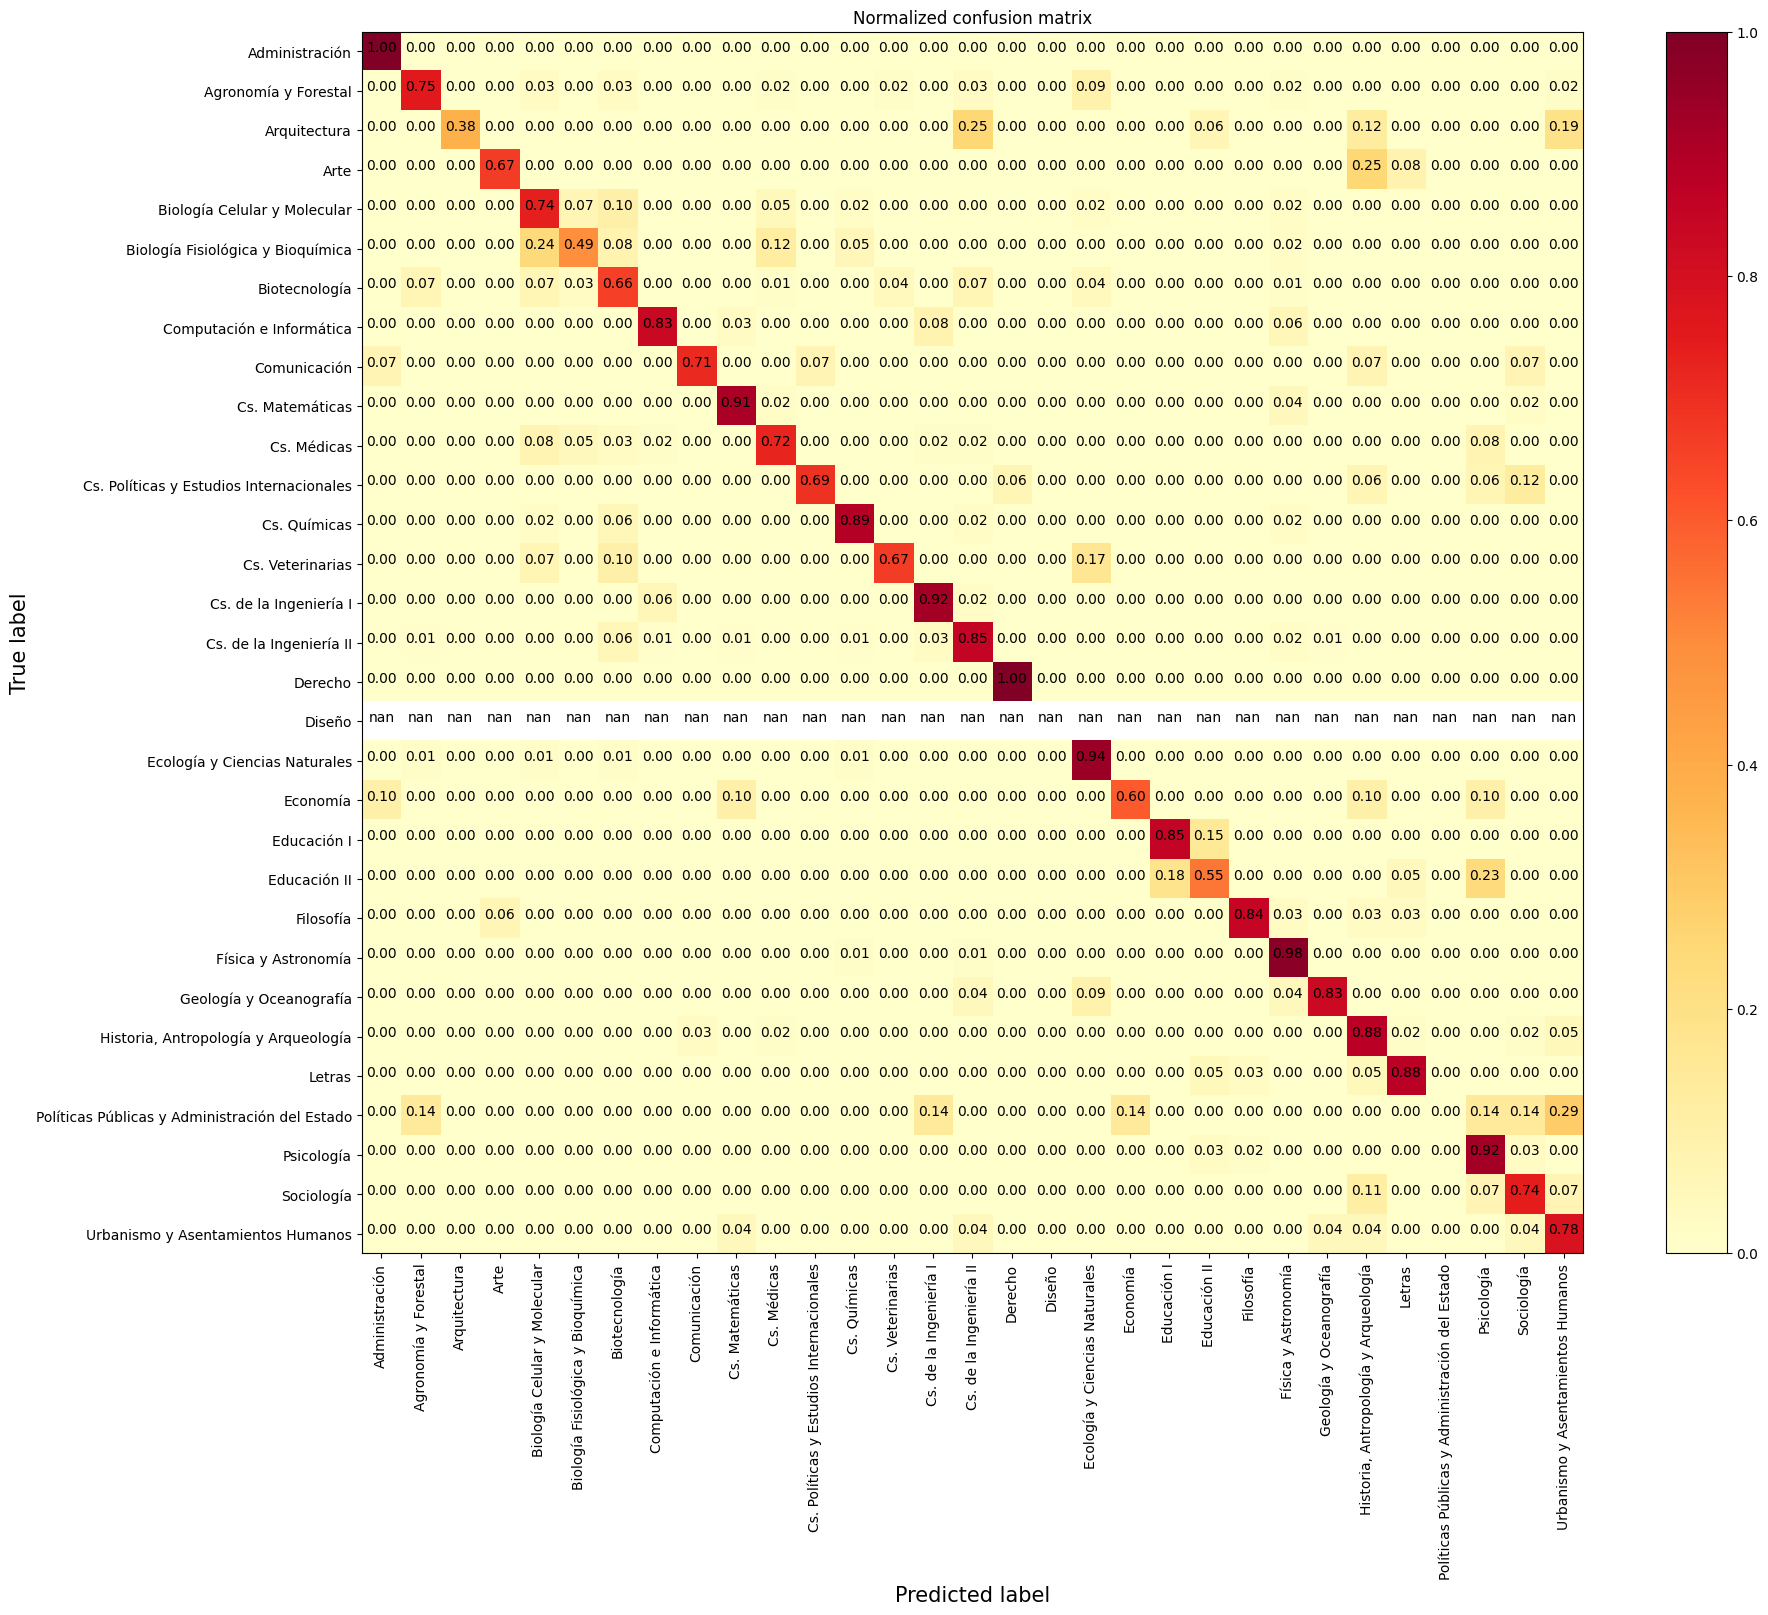

In [51]:
import itertools
from sklearn.metrics import confusion_matrix

plt.style.use('default')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.YlOrRd):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustar los límites de los ejes x e y
    plt.xlim(-0.5, len(classes)-0.5)
    plt.ylim(len(classes)-0.5, -0.5)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

# Ejemplo de uso:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=comites)
cnf_matrix = np.nan_to_num(cnf_matrix, nan=0)
plt.figure(figsize=(20,16))
plot_confusion_matrix(cnf_matrix, classes=comites, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
#cleaner = np.vectorize(clean)
#X_test_clean = cleaner(list(X_test))
#X_test_dtm = vectorizer.transform(X_test_clean)
#y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
#print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

In [58]:
import itertools
from sklearn.metrics import confusion_matrix

plt.style.use('default')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustar los límites de los ejes x e y
    plt.xlim(-0.5, len(classes)-0.5)
    plt.ylim(len(classes)-0.5, -0.5)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

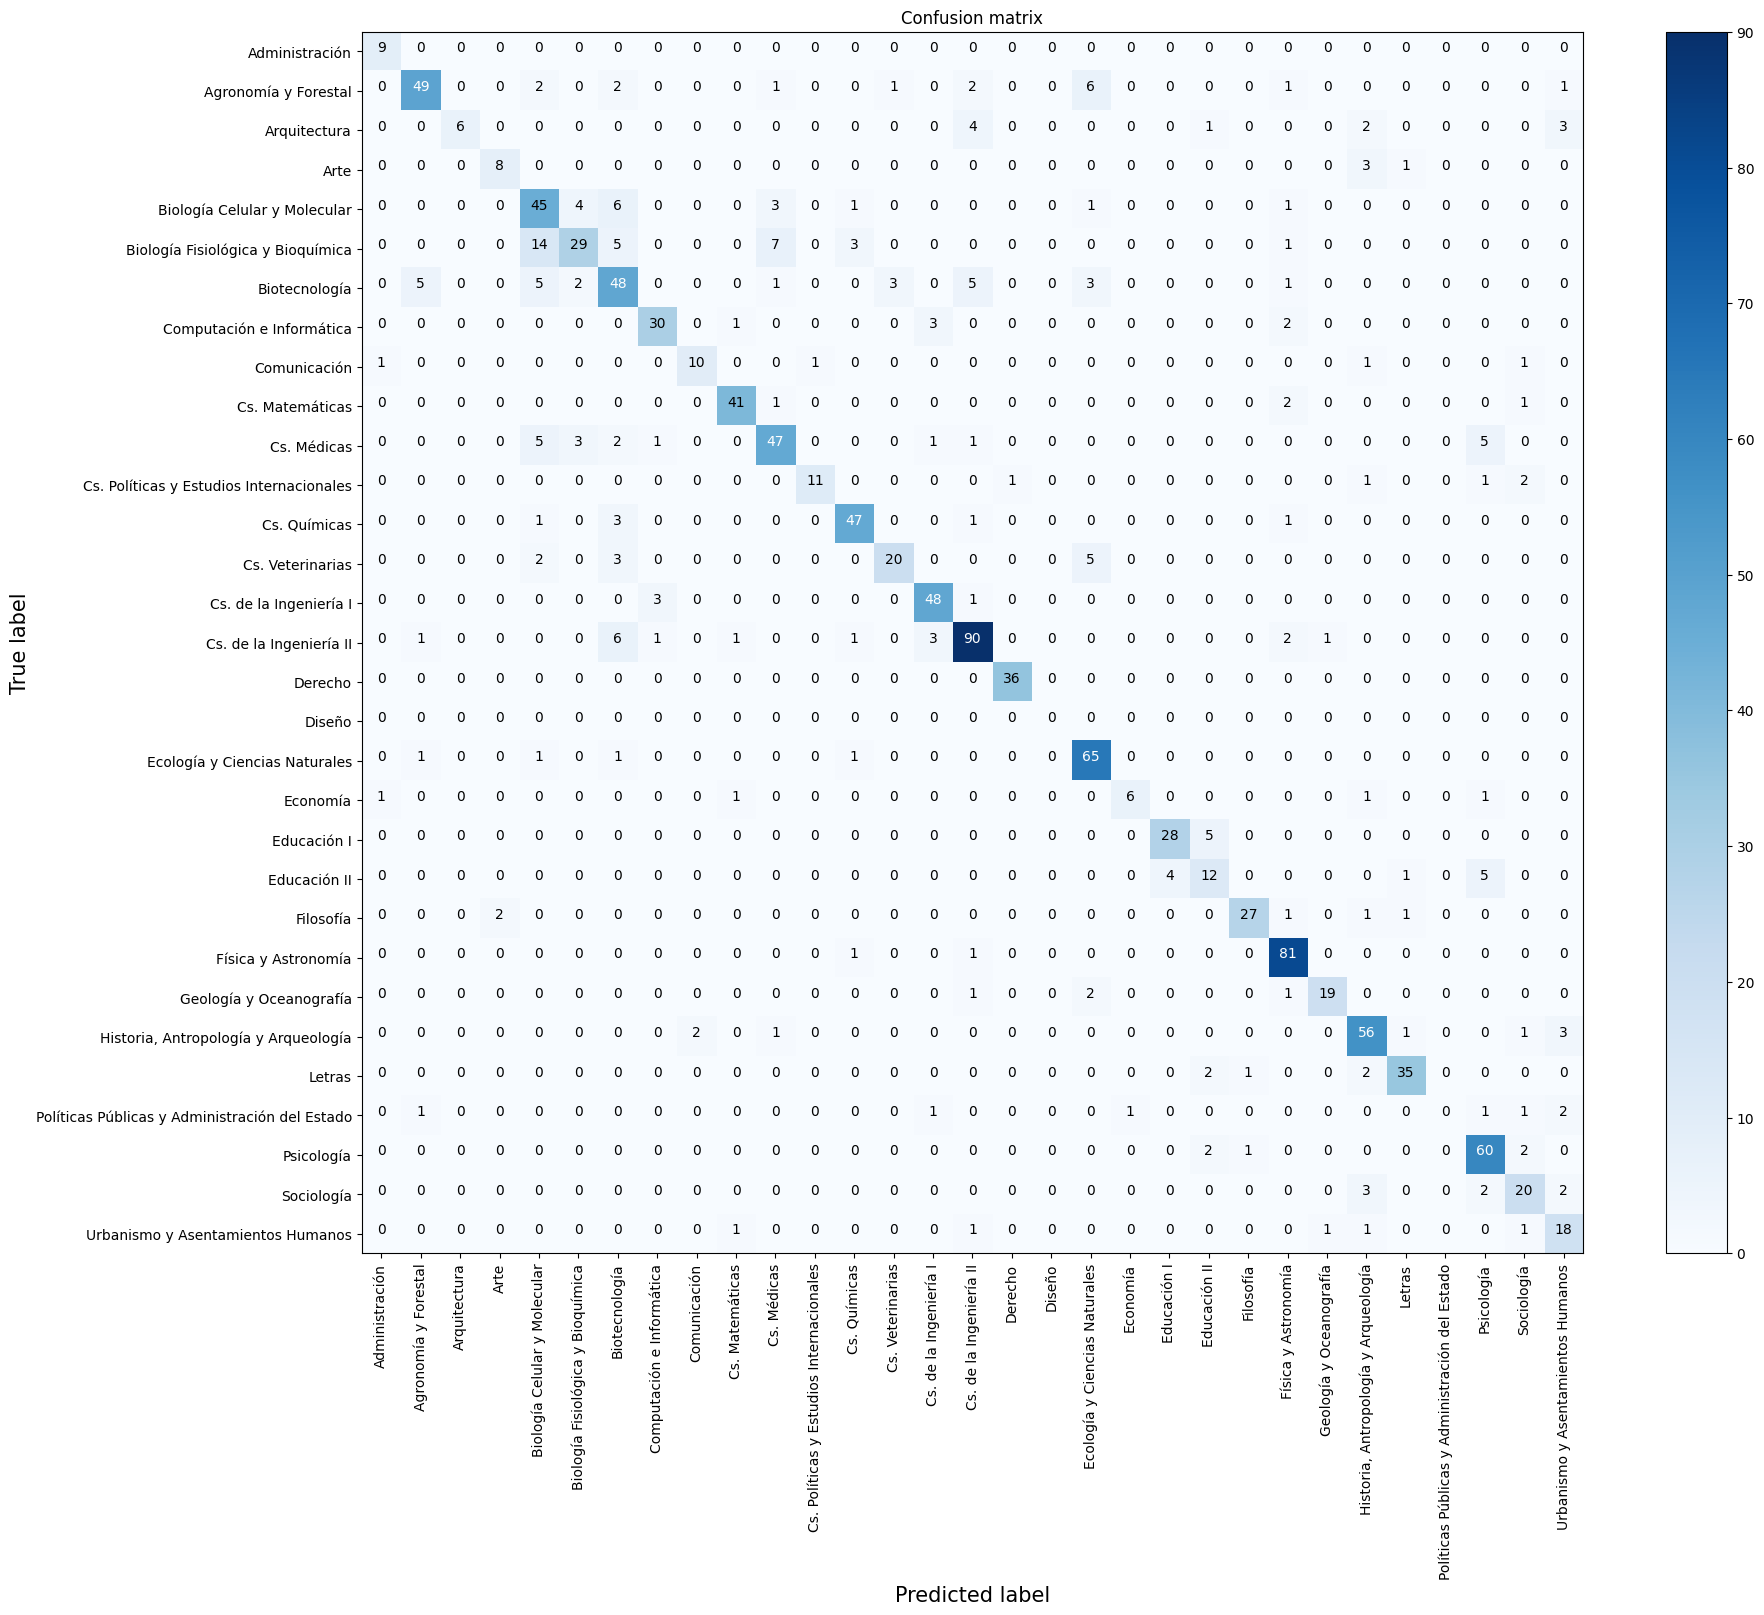

In [59]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=comites)
cnf_matrix = np.nan_to_num(cnf_matrix, nan=0)
plt.figure(figsize=(20,16))
plot_confusion_matrix(cnf_matrix, classes=comites, normalize=False,
                      title='Confusion matrix')
plt.show()

## Predicción
---

Hacemos una predicción utilizando los datos de solo una postulación:

In [60]:
n = 5899

print("COMITÉ INICIAL (TP) =>", df["COMITÉ INICIAL (TP)"][n])
print("COMITÉ DEFINITIVO (L2) =>", df["COMITÉ DEFINITIVO (L2)"][n])
print("PROGRAMA =>", df["PROGRAMA"][n])
print("PALABRAS 1 =>", df["PALABRAS 1"][n])
print("PALABRAS 2 =>", df["PALABRAS 2"][n])
print("PALABRAS 3 =>", df["PALABRAS 3"][n])
print("OBJETIVO =>", df["OBJETIVO"][n])

COMITÉ INICIAL (TP) => Economía
COMITÉ DEFINITIVO (L2) => Cs. Matemáticas
PROGRAMA => Doctorado en Estadística
PALABRAS 1 => 5302 Econometría - 02 Modelos econométricos
PALABRAS 2 => 5304 Actividad económica - 06 Dinero y operaciones bancarias
PALABRAS 3 => -
OBJETIVO => Mi objetivo de estudio se centra en extender y ampliar resultados en la teoria de modelos econométricos específicamente en analisis predictivo de Series temporales (ST), modelos de Machine Learning (ML). Esta linea de investigación ha sido ampliamente estudiada desde el siglo pasado, teniendo un gran auge en las últimas 4 décadas. La ST estudian problemas que  consiste en  determinar componentes autorregresivos y medias móviles ,tanto para modelos estacionales y no estacionales en ambientes homocedásticos y no  (Modelos ARCH , GARCH y EGARCH) que nos permitan generar un modelo estadístico y asi prever valores futuros para dicha serie.  con el objetivo de  hallar este modelo desconocido  de ST es que tenemos la contribu

In [61]:
from sklearn.preprocessing import normalize

# ajustar el vectorizador en todo el conjunto de datos
vectorizer.fit(df["PROGRAMA"] + " " + df["OBJETIVO"] + " " + df["PALABRAS 1"])

# utilizar el modelo
comite_inicial = [df["COMITÉ INICIAL (TP)"][n]]
comite_final = [df["COMITÉ DEFINITIVO (L2)"][n]]
folio = [df["FOLIO"][n]]

texto = [df["PROGRAMA"][n] + " " + df["OBJETIVO"][n] + " " + df["PALABRAS 1"][n]]

# Vectorizar las características de texto
X = vectorizer.transform(texto).toarray()
X_normalized = normalize(X, norm='l2')

#Estimación
comite_predicho = model.predict(X_normalized)

print(f"El folio {folio} perteniecía a {comite_inicial} y ahora corresponde a {comite_final} | El modelo pronostica => {comite_predicho}")

El folio [21231890] perteniecía a ['Economía'] y ahora corresponde a ['Cs. Matemáticas'] | El modelo pronostica => ['Cs. Matemáticas']


Ahora realizaremos predicciones iterando en cada valor del DataFrame.

In [70]:
# ajustar el vectorizador en todo el conjunto de datos
vectorizer.fit(df["PROGRAMA"] + " " + df["OBJETIVO"] + " " + df["PALABRAS 1"])

# para cada fila en el dataframe, transformar el texto a vector y predecir

for index, row in tqdm(df.iterrows(), total=len(df)):
    texto = [row["PROGRAMA"] + " " + row["OBJETIVO"] + " " + row["PALABRAS 1"]]
    X = vectorizer.transform(texto).toarray()
    X_normalized = normalize(X, norm='l2')
    comite_predicho = model.predict(X_normalized)
    df.at[index, "COMITÉ SUGERIDO (SVC)"] = comite_predicho

100%|██████████| 6230/6230 [27:14<00:00,  3.81it/s]


Se podria hacer así también:
```
texto = df["PROGRAMA"] + " " + df["OBJETIVO"] + " " + df["PALABRAS 1"]
X = vectorizer.transform(texto).toarray()
X_normalized = normalize(X, norm='l2')
comite_predicho = model.predict(X_normalized)
df["COMITÉ SUGERIDO (SVC)"] = comite_predicho

```

In [63]:
df

,AÑO,FOLIO,COMITÉ INICIAL (TP),COMITÉ DEFINITIVO (L2),OBJETIVO,PROGRAMA,PALABRAS 1,PALABRAS 2,PALABRAS 3,COMITÉ SUGERIDO (SVC)
0,2021,21210001,Ecología y Ciencias Naturales,Ecología y Ciencias Naturales,"Contaminación, tecnología y remediación del ag...",Doctorado en Ciencias Ambientales mención Sist...,"2513 Ciencias Ambientales - 1 Tratamiento, dep...",2513 Ciencias Ambientales - 18 Gestión de resi...,-,[Ecología y Ciencias Naturales]
1,2021,21210002,Cs. de la Ingeniería II,Cs. de la Ingeniería II,La pérdida de piezas dentales afecta la calida...,Doctorado en Ingeniería Metalúrgica,3312 Tecnología de materiales - 12 Ensayos de ...,3315 Tecnología metalúrgica - 11 Pulvimetalurgia,-,[Cs. de la Ingeniería II]
2,2021,21210003,Biología Celular y Molecular,Biología Celular y Molecular,La lesión de médula espinal (LME) es una condi...,Doctorado en Ciencias Biológicas mención Biolo...,2407 Biología celular - 01 Cultivo celular,2407 Biología celular - 05 Cultivo de tejidos,2407 Biología celular - 06 Regeneración tisular,[Biología Celular y Molecular]
3,2021,21210004,Cs. Políticas y Estudios Internacionales,Derecho,La evaluación del cumplimiento efectivo que se...,Doctorado en Ciencia Política,5905 Política Comparada - 01 Instituciones Pol...,-,-,[Derecho]
4,2021,21210005,Administración,Administración,1.- Debido al rol que cumplen las IES en la fo...,Doctorado en Ciencias Humanas,"6103 Psicología industrial, del trabajo y de l...",-,-,[Administración]
...,...,...,...,...,...,...,...,...,...,...
6225,2023,21232432,Biotecnología,Biotecnología,La flavobacteriosis es una enfermedad provocad...,Doctorado en Biotecnología,"2412 Inmunología (ver 2302.16, 3109.03, 3207.1...","2412 Inmunología (ver 2302.16, 3109.03, 3207.1...",-,[Cs. Veterinarias]
6226,2023,21232435,Filosofía,Filosofía,Mi objetivo de estudio consiste en elaborar un...,Doctorado en Filosofía con mención en Filosofía,7201 Filosofía del conocimiento - 02 Epistemol...,7202 Antropología filosófica - 07 Filosofía de...,7207 Filosofía social - 01 Filosofia de la cul...,[Filosofía]
6227,2023,21232438,Derecho,Derecho,\r\nEstoy desarrollando mi investigación de D...,Doctorado en Derecho,5699 Otras especialidades jurídicas - otras,-,-,[Derecho]
6228,2023,21232439,Agronomía y Forestal,Agronomía y Forestal,La tesis se alinea con el objetivo del program...,Doctorado en Ciencias de la Agricultura,3103 Agronomía (ver 2417 y 5312.01 ) - 04 Prot...,3103 Agronomía (ver 2417 y 5312.01 ) - 05 Técn...,-,[Agronomía y Forestal]


## Exportar datos
---

In [64]:
df.to_csv("/gdrive/MyDrive/PRODUCTOS/PREDICCIONES (SVC).csv", sep=";",encoding="latin1")

In [65]:
from google.colab import files
files. download("/gdrive/MyDrive/PRODUCTOS/PREDICCIONES (SVC).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Serialización del Modelo
---

In [66]:
import pickle
# serializar el modelo
filename = '/gdrive/MyDrive/PRODUCTOS/MachineLearningModel/modelo_svc.pickle'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


Para cargar el modelo serializado posteriormente y utilizarlo para hacer predicciones, se puede hacer lo siguiente:
```
import pickle

# cargar el modelo
filename = '/gdrive/MyDrive/PRODUCTOS/MachineLearningModel/modelo_svc.pickle'
with open(filename, 'rb') as file:
    model = pickle.load(file)

# hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)
```